In [1]:
pip install pymc3

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from sklearn.linear_model import LogisticRegression
import pymc3 as pm

## The Dataset

You can download the dataset from here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [2]:
## 1 point

## ToDo: read the csv file into a dataframe and show the first 5 rows
diab_df=pd.read_csv('diabetes.csv')
diab_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diab_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
## 3 points

## Assign the Outcome variable to y and the rest to X.
## USe LogisticRegression to fit the data and print out the intercept and the coefficients
x=diab_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y=diab_df[['Outcome']]
logreg_model=LogisticRegression()
logreg_model.fit(x,y)
inter=logreg_model.intercept_
coff=logreg_model.coef_
print(f'Intercept: {inter}\nCoefficients: {coff}')

Intercept: [-7.70289542]
Coefficients: [[ 1.17252326e-01  3.35996269e-02 -1.40874324e-02 -1.27055067e-03
  -1.24030945e-03  7.72025744e-02  1.41904103e+00  1.00355604e-02]]


/Users/yuexuanli/Desktop/Spring2023_Projects/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yuexuanli/Desktop/Spring2023_Projects/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
## 2 points

## Explain what the code is doing:
## What are the prior probabilities of the intercept and coefficients?
# Which likelihood distribution has been used?
## What does pm.invlogit(linreg) mean?
## What is map_est?

with pm.Model() as logreg_model:
  
    w0 = pm.Normal('w0', mu=0, sd=100)
    w1 = pm.Normal('w1', mu=0, sd=100)
    w2 = pm.Normal('w2', mu=0, sd=100)
    w3 = pm.Normal('w3', mu=0, sd=100)
    w4 = pm.Normal('w4', mu=0, sd=100)
    w5 = pm.Normal('w5', mu=0, sd=100)
    w6 = pm.Normal('w6', mu=0, sd=100)
    w7 = pm.Normal('w7', mu=0, sd=100)
    w8 = pm.Normal('w8', mu=0, sd=100)
   
    
    linreg = w0 * np.ones(diab_df.shape[0]) + w1 * diab_df.Pregnancies.values + w2 * diab_df.Glucose.values \
    + w3 * diab_df.BloodPressure.values + w4 * diab_df.SkinThickness.values + w5 * diab_df.Insulin.values + \
    w6 * diab_df.BMI.values + w7 * diab_df.DiabetesPedigreeFunction.values + w8 * diab_df.Age.values
    p_outcome = pm.invlogit(linreg)

    likelihood = pm.Bernoulli('likelihood', p_outcome, observed=diab_df.Outcome.values)

    
    map_est= pm.find_MAP()
    print(map_est)
    
# This code is to find the best parameter for each feature that contributes the maximum posterior distribution.
# The intercept is w0, and  which from w1 to w8 are coefficients. All of them used normal distributions with a mean of 0 and a standard deviation of 100.
# The used likelihood distribution is Bernoulli.
# pm.invlogit(linreg) is used to convert the linreg result to a probability between 0 and 1.
#  map_est is used to find the  MAP estimate parameter in the given data.


{'w0': array(-8.40524686), 'w1': array(0.12315225), 'w2': array(0.03516268), 'w3': array(-0.01329004), 'w4': array(0.00060895), 'w5': array(-0.00119067), 'w6': array(0.08970523), 'w7': array(0.94497011), 'w8': array(0.01488309)}


/Users/yuexuanli/Desktop/Spring2023_Projects/myenv/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 400 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [w8]
>Metropolis: [w7]
>Metropolis: [w6]
>Metropolis: [w5]
>Metropolis: [w4]
>Metropolis: [w3]
>Metropolis: [w2]
>Metropolis: [w1]
>Metropolis: [w0]
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [w8]
>Metropolis: [w7]
>Metropolis: [w6]
>Metropolis: [w5]
>Metropolis: [w4]
>Metropolis: [w3]
>Metropolis: [w2]
>Metropolis: [w1]
>Metropolis: [w0]


Sampling 4 chains for 1_000 tune and 400 draw iterations (4_000 + 1_600 draws total) took 13 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/yuexuanli/Desktop/Spring2023_Projects/myenv/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<Axes: title={'center': 'w0'}>, <Axes: title={'center': 'w1'}>,
        <Axes: title={'center': 'w2'}>],
       [<Axes: title={'center': 'w3'}>, <Axes: title={'center': 'w4'}>,
        <Axes: title={'center': 'w5'}>],
       [<Axes: title={'center': 'w6'}>, <Axes: title={'center': 'w7'}>,
        <Axes: title={'center': 'w8'}>]], dtype=object)

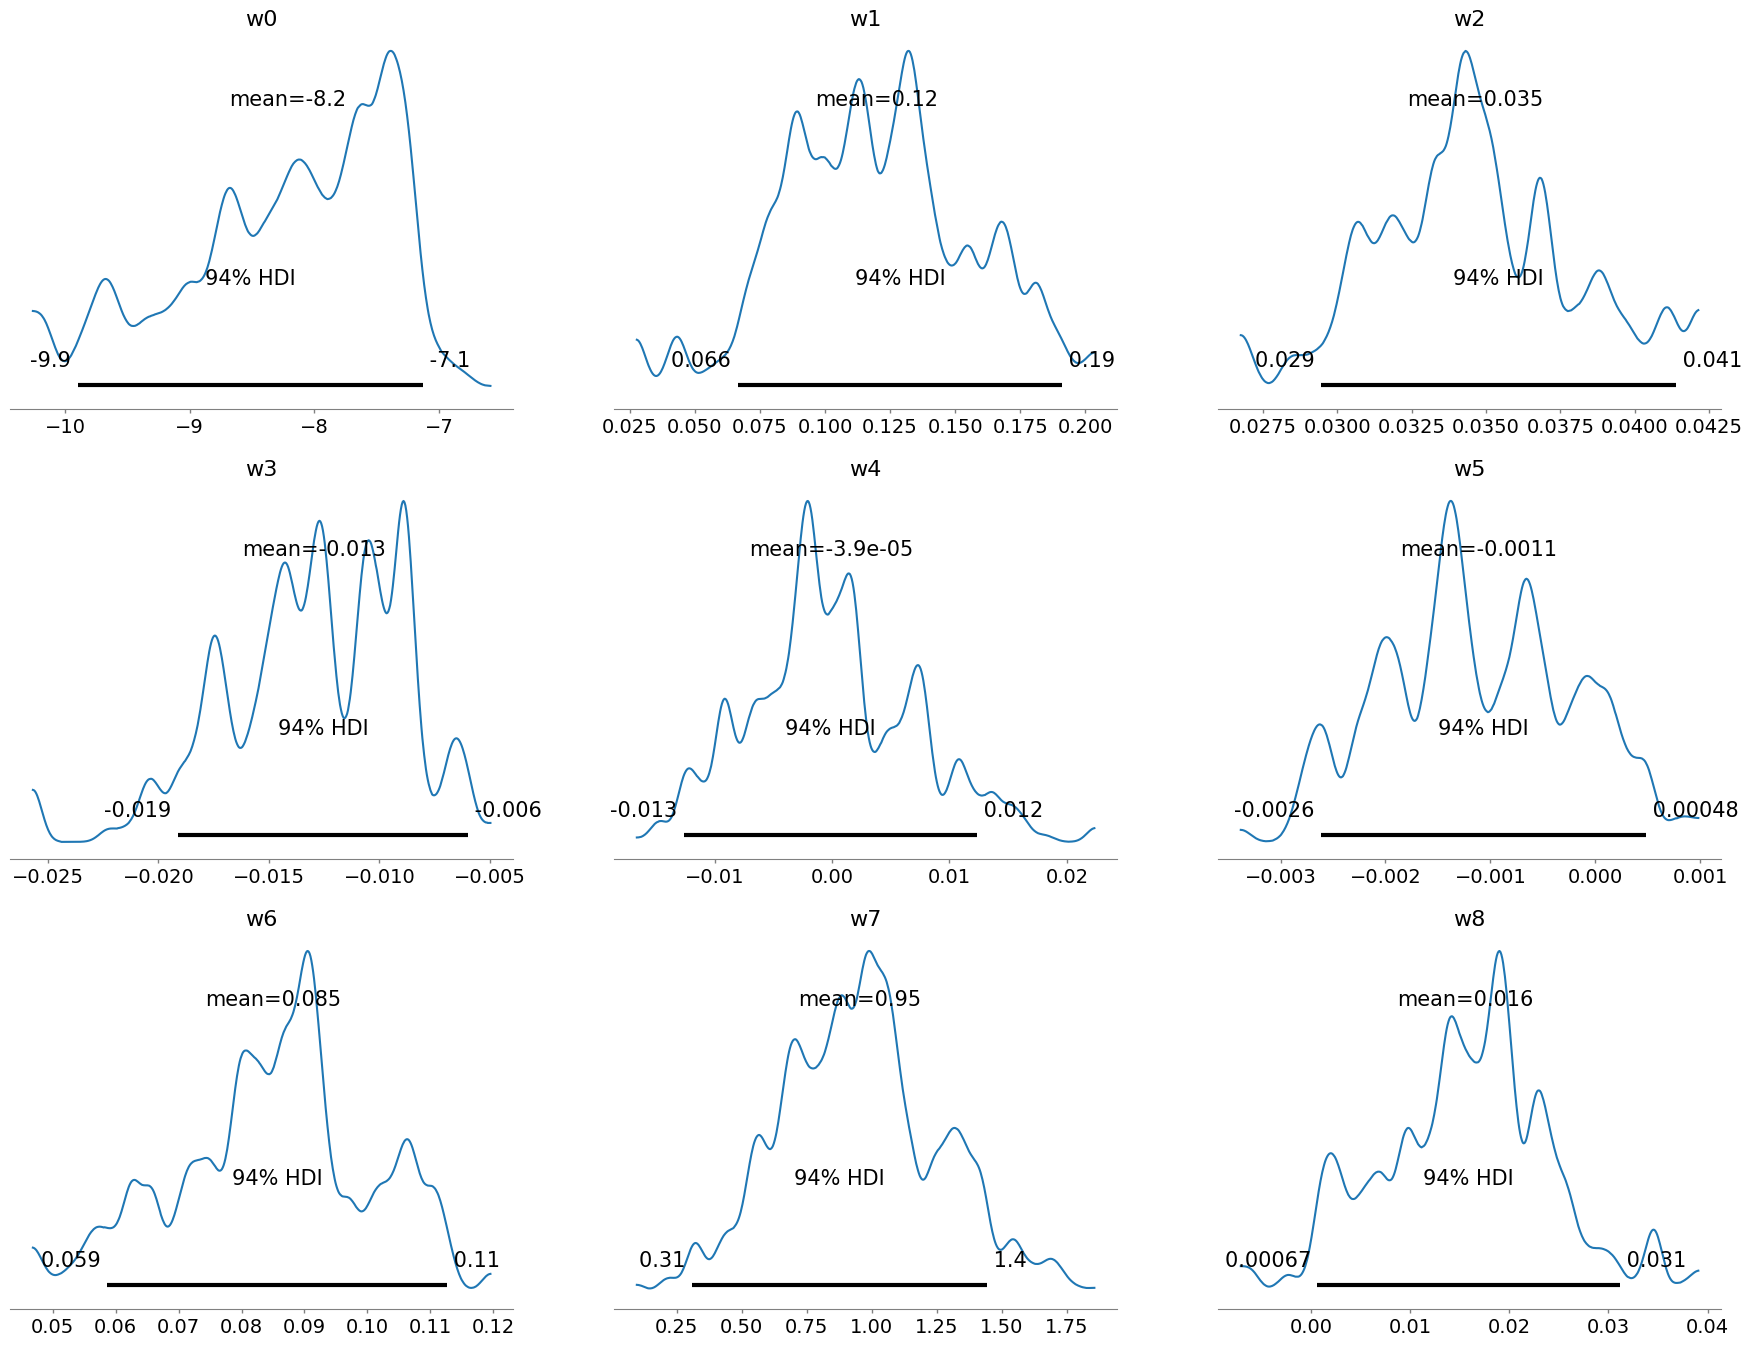

In [6]:
## 2 points
with logreg_model:
## ToDo: draw 400 samples using pm.Metropolis() and assign to the variable trace
    trace = pm.sample(draws=400, step=pm.Metropolis())
## Explain the output of the plot 
az.plot_posterior(trace)
# From the graphs below, we can conclude that w4 has the lowest uncertainty and w7 has the 
# highest uncertainty. Besides, w0 skewed left, which indicates the mean of the posterior distribution 
# may be biased towards the left. Furthermore, we can see that w1 and w2 have multiple peaks in their graphs,
# which means those parameters may have multiple plausible values.